<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all libraries

**BUSINESS PROBLEM**

Build a prediction model for Salary hike

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

In [4]:
slry=pd.read_csv('Salary_Data.csv')
slry

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
slry.shape

(30, 2)

In [6]:
slry.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
slry.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
slry.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [9]:
slry.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [10]:
slry.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [11]:
slry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
slry.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

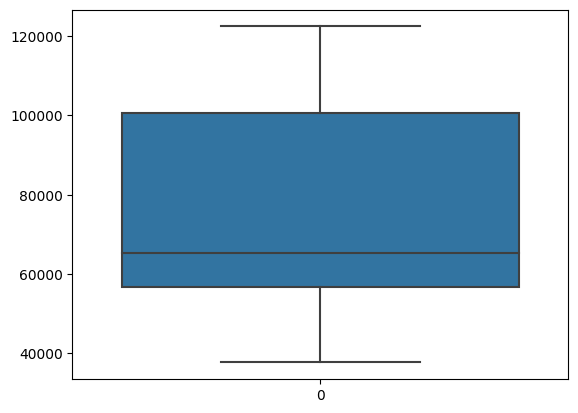

In [13]:
sns.boxplot(slry['Salary'])

<Axes: >

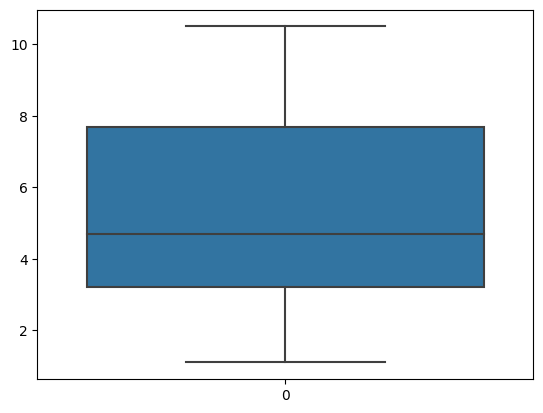

In [14]:
sns.boxplot(slry['YearsExperience'])

In [15]:
# through the above boxplots , we can draw the conclusion that the data is free from outliers

<Axes: >

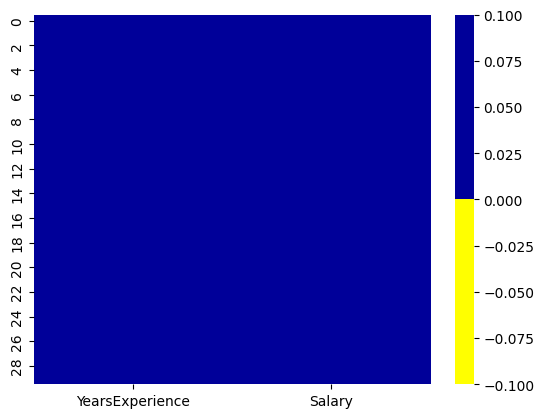

In [16]:
cols=slry.columns
color=['#ffff00','#000099']
sns.heatmap(slry[cols].isnull(),cmap=sns.color_palette(color))

In [18]:
slry[slry.duplicated]

,YearsExperience,Salary


**INFERENCE FROM EDA**

From the above EDA we can draw inference that


*   Maximum candidates years of experience lie between 4 and 6 years of experience while the salary wary between 60,000 and 80,000
*   the cadidate with 10 years of experience receive highest salary 122391 while the cadidate with as low experience as 1 year receive 37731 salary



In [27]:
# graphical inference

<ipython-input-31-6115c2f933f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(slry['Salary'])


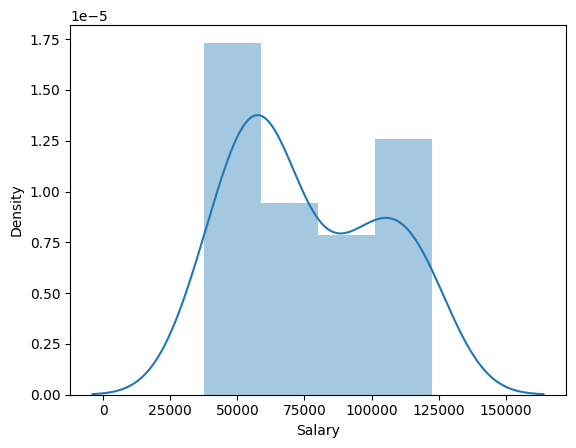

In [31]:
sns.distplot(slry['Salary'])
plt.show()

<ipython-input-32-c7ece183a2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(slry['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

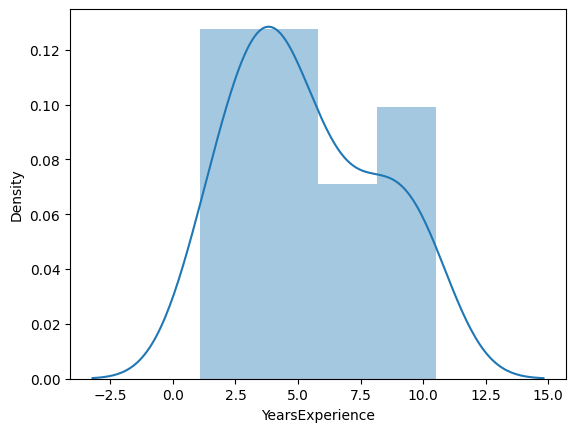

In [32]:
sns.distplot(slry['YearsExperience'])

In [19]:
# hence , the data is free from null values and duplicate values

In [20]:
# scatterplot - to know the direction of two variables

<Axes: xlabel='YearsExperience', ylabel='Salary'>

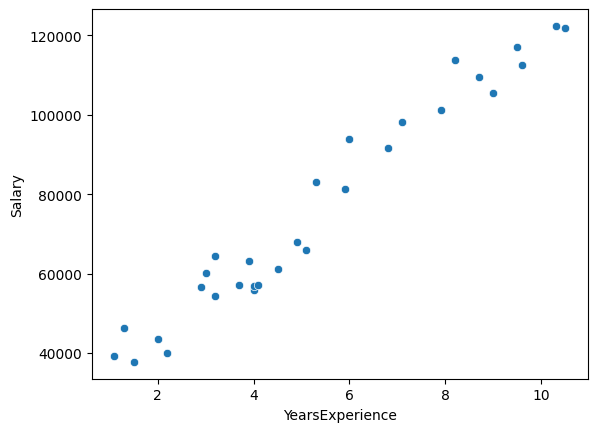

In [21]:
sns.scatterplot(x='YearsExperience',y='Salary',data=slry)

In [23]:
# from the above scatterplot , we can conclude saying that , both the variables are 'positively linear associated' with each other
# as the years of experience increases , the salary also increases

In [24]:
# correlation = to know the strength between two  variables

<Axes: >

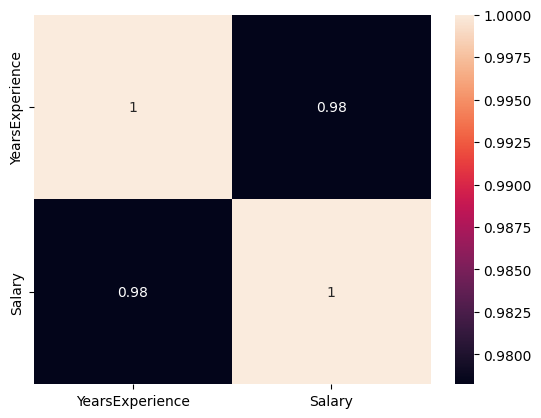

In [25]:
sns.heatmap(slry.corr(),annot=True)

In [26]:
# from the above correlation matrix , we can conclude saying that the correlation between similar variables (salary, years of experience ) is perfectly positive
# the correlation between salary and years of experience is perfectly positive

<Axes: xlabel='Salary', ylabel='YearsExperience'>

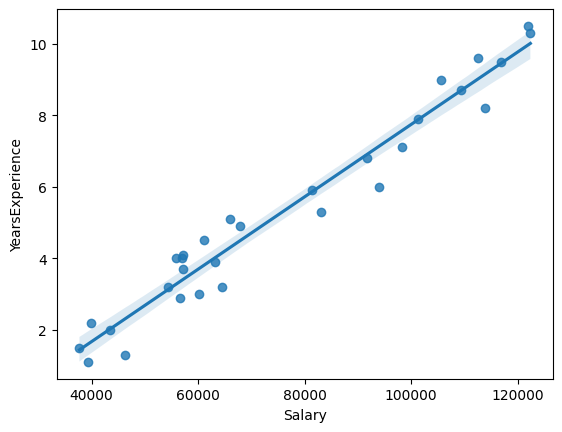

In [37]:
sns.regplot(x=slry['Salary'],y=slry['YearsExperience'],data=slry)


The above regression plot is the line of best fit

In [33]:
# building the model

In [36]:
model=smf.ols('Salary~YearsExperience',data=slry).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        09:28:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**INFERENCE     :**      
The above linear model is accurate
r_squared value is 95 % (accurate enough)


p_value < 0.05 (x is significant)

the coefficients are  Bo is 2.579e+04 and B1 9449.9623

In [39]:
pred=model.predict(slry)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [43]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [46]:
rmse_lin=np.sqrt(np.mean((np.array(slry['YearsExperience'])-np.array(pred))**2))
rmse_lin

80440.84508275456

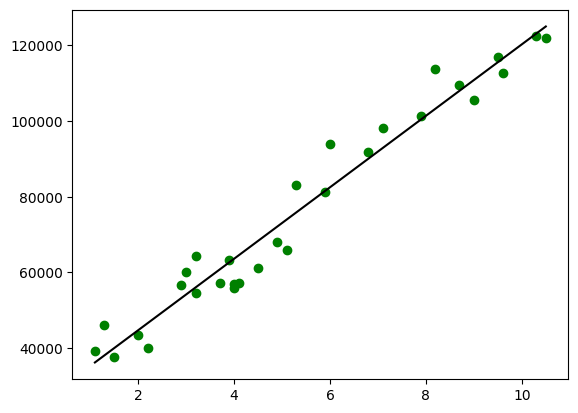

In [49]:
plt.scatter(x=slry['YearsExperience'],y=slry['Salary'],color='green')
plt.plot(slry['YearsExperience'],pred,color='black')

**The Linear regression model equation**

Salary = Bo(2.579e+04)+B1(9449.9623)x+residuals(error)

In [50]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

MODEL VALIDATION TECHNIQUES

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

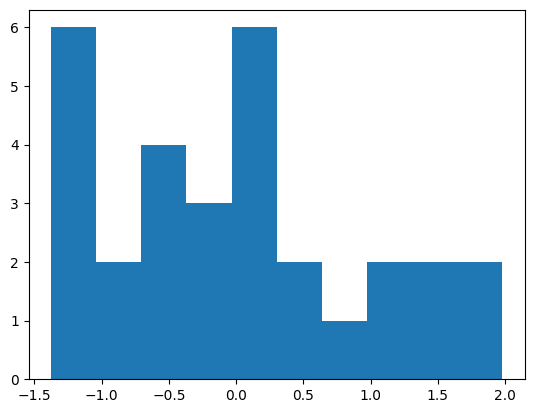

In [51]:
plt.hist(model.resid_pearson)

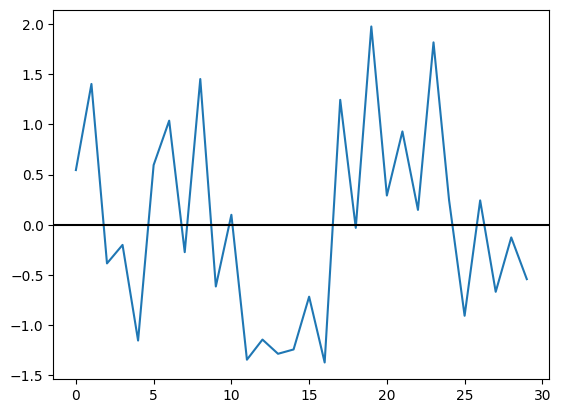

In [53]:
plt.plot(np.arange(30),model.resid_pearson)
plt.axhline(y=0,color='black')